# Tutorial
## [How to do Novelty Detection in Keras with Generative Adversarial Network](https://www.dlology.com/blog/how-to-do-novelty-detection-in-keras-with-generative-adversarial-network-part-2/) | DLology

This notebook is for test phase Novelty Detection. To Train the model, run this first.
```bash
python models.py
```

It is recommended to understand how the model works in general before continuing the implementation. 

→ [How to do Novelty Detection in Keras with Generative Adversarial Network (Part 1)](https://www.dlology.com/blog/how-to-do-novelty-detection-in-keras-with-generative-adversarial-network/)


In [1]:
from utils import *
from kh_tools import *
import models
import imp
imp.reload(models)
from models import ALOCC_Model
from keras.datasets import mnist

from keras.losses import binary_crossentropy
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
self =ALOCC_Model(dataset_name='mnist', input_height=64,input_width=64)


generator
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z (InputLayer)               (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)       0         

/home/pirl/anaconda3/envs/alocc/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## Choose a stopping criterion
The training procedure is stopped when R successfully maps noisy images to clean images carrying the concept of the target class.  When R can reconstruct its input with minimum error. In the following case, we pick the epoch 3.

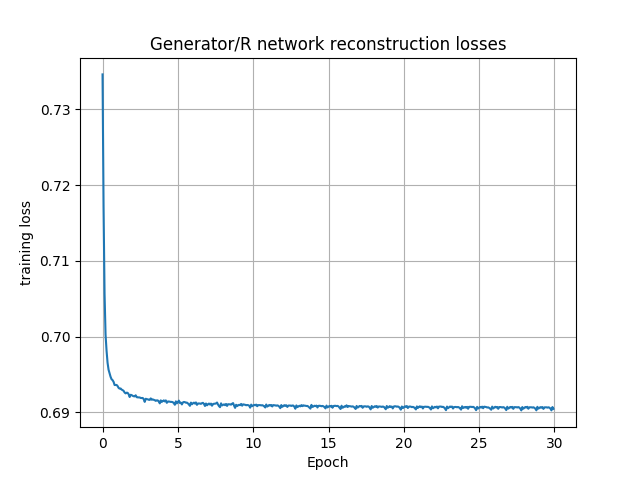

In [3]:
# This image was generated at the end of the models.py training procedure to help pick a ending epoch to load. 
from IPython.display import Image
Image(filename='plot_g_recon_losses.png') 


In [4]:
# Load the epoch #3 saved weights.
self.adversarial_model.load_weights('./checkpoint/ALOCC_Model_29.h5')

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'hwang/test',
        target_size=(64, 64),
        #color_mode='grayscale',
        class_mode='binary')

y, _ = validation_generator.next()
y[0].reshape(-1, 64, 64, 3).shape

Found 10 images belonging to 2 classes.


(1, 64, 64, 3)

## Test the reconstruction loss and Discriminator output
The `abnormal` image has a **`larger` reconstruction loss** and **`smaller` discriminator output value**.

In [6]:
def test_reconstruction(index):
    data = y[index].reshape(-1, 64, 64, 3)
    model_predicts = self.adversarial_model.predict(data)
    
    fig= plt.figure(figsize=(8, 8))
    columns = 1
    rows = 2
    fig.add_subplot(rows, columns, 1)
    input_image = data.reshape((64, 64, 3))
    reconstructed_image = model_predicts[0].reshape((64, 64, 3))
    plt.title('Input')
    plt.imshow(input_image, label='Input')
    fig.add_subplot(rows, columns, 2)
    plt.title('Reconstruction')
    plt.imshow(reconstructed_image, label='Reconstructed')
    plt.show()
    # Compute the mean binary_crossentropy loss of reconstructed image.
    y_true = K.variable(reconstructed_image)
    y_pred = K.variable(input_image)
    error = K.eval(binary_crossentropy(y_true, y_pred)).mean()
    print('Reconstruction loss:', error)
    print('Discriminator Output:', model_predicts[1][0][0])

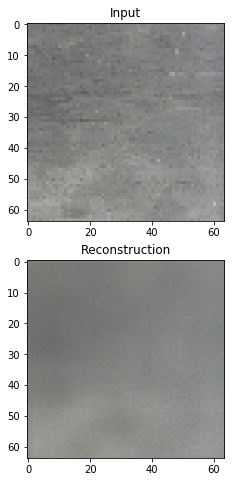

Reconstruction loss: 0.6904457
Discriminator Output: 0.57472384


In [7]:
test_reconstruction(0)

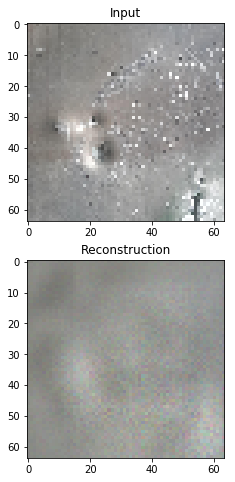

Reconstruction loss: 0.7110199
Discriminator Output: 0.58451295


In [8]:
test_reconstruction(1)

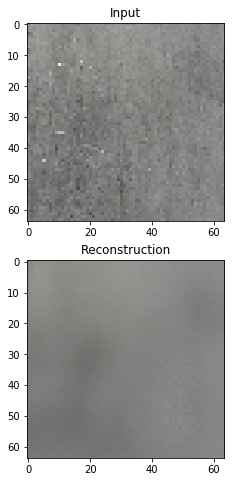

Reconstruction loss: 0.69319946
Discriminator Output: 0.5720659


In [9]:
test_reconstruction(2)

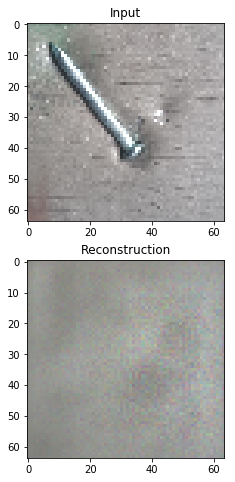

Reconstruction loss: 0.7344669
Discriminator Output: 0.58526456


In [10]:
test_reconstruction(3)

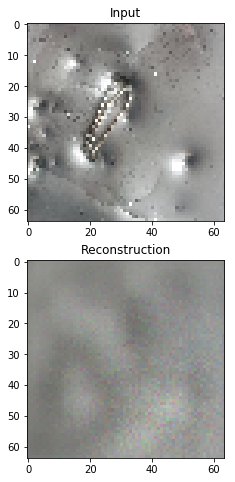

Reconstruction loss: 0.7473413
Discriminator Output: 0.5797297


In [11]:
test_reconstruction(4)

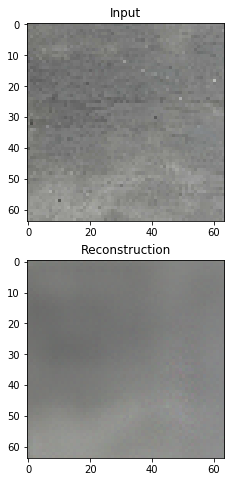

Reconstruction loss: 0.6907339
Discriminator Output: 0.57368714


In [12]:
test_reconstruction(5)

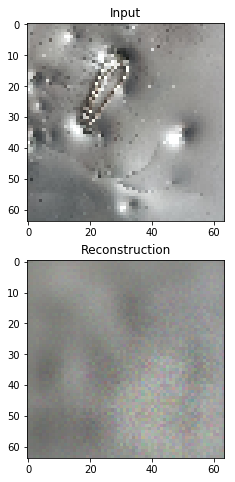

Reconstruction loss: 0.7359586
Discriminator Output: 0.5817322


In [13]:
test_reconstruction(6)

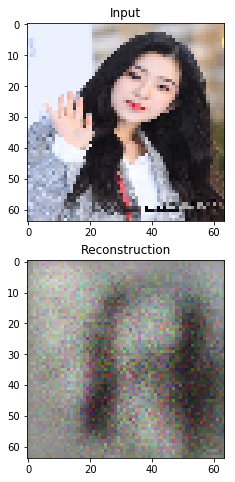

Reconstruction loss: 1.0609226
Discriminator Output: 0.5664299


In [14]:
test_reconstruction(7)

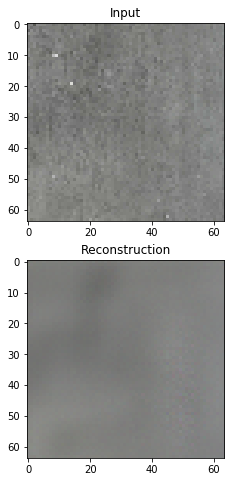

Reconstruction loss: 0.69373226
Discriminator Output: 0.5704842


In [15]:
test_reconstruction(8)

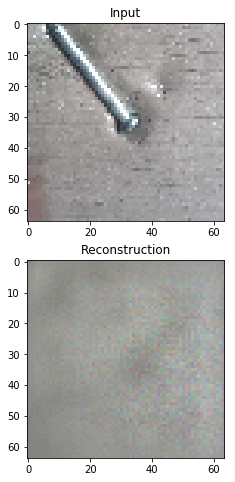

Reconstruction loss: 0.72856927
Discriminator Output: 0.5857292


In [16]:
test_reconstruction(9)